In [7]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [8]:
plt.rcParams['figure.dpi'] = 120

# Overview of the Konno-Ohmachi Smoothing Window

This is an overview of the Konno-Ohmachi smoothing window and the implemenation within `cyko`. The document is based on 
the summary prepared by Jamie Steidl and Paul Hegarty.

The Konno-Ohmachi smoothing window is defined as:

$$
\begin{align}
W_B(f, f_c) &  = a \cdot \left( \frac{\sin(b \log_{10}(f / f_c))}{b \log_{10}(f / f_c)} \right)^4 \\
            &  = a \cdot \text{sinc} (b \log_{10}(f / f_c) ) ^ 4
\end{align}
$$
where $a$ is the the scaling parameter and $b$ controls the bandwidth or "fatness" of the lobes. This function is symmetric and uniform in log frequency space about the the given center frequency $f_c$. As the value of $b$ increases, the bandwidth decreases.

In [9]:
freq_ratio = np.logspace(-1, 1, num=256)

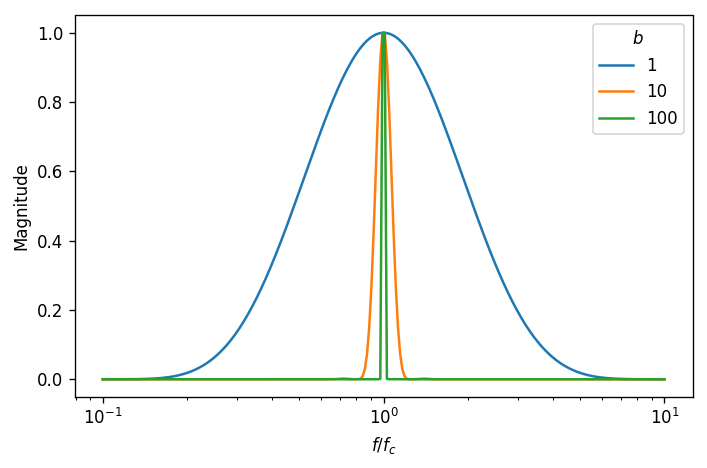

In [12]:
fig, ax = plt.subplots()

for b in [1, 10, 100]:
    window = np.sinc(b * np.log10(freq_ratio)) ** 4
    window /= window.max()
    ax.plot(freq_ratio, window, label=f'{b:.0f}')

ax.legend(title='$b$')
ax.set(xlabel='$f/f_c$', xscale='log', ylabel='Magnitude')

fig.tight_layout();

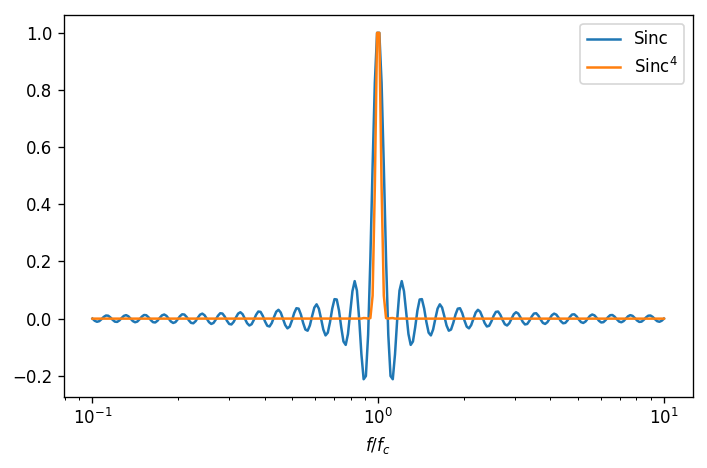

In [13]:
fig, ax = plt.subplots()

ko_bw = 30.
freq_ratio = np.logspace(-1, 1, num=256)
sinc = np.sinc(ko_bw * np.log10(freq_ratio))
sinc /= sinc.max()

ax.plot(freq_ratio, sinc, label='Sinc')
ax.plot(freq_ratio, sinc ** 4, label='Sinc$^4$')

ax.legend()
ax.set(xlabel='$f/f_c$', xscale='log', )

fig.tight_layout();

# Limits

In order to improve the performance of the filter, it is necessary to compute the range over which the window is non-zero. The filter is non-zero between $f_c/\alpha$ and $\alpha \cdot f_c$, where $\alpha = 10^{\pi / b} \approx 10^{3 / b}$. Consider when $f = f_c / \alpha = f_c / 10^{3 / b}$:
$$
\begin{align}
W_B(f, f_c) & = a \cdot \left( \frac{\sin \left( b \log_{10} \left( \frac{f_c}{10^{3 / b} / f_c} \right) \right) }{b \log_{10} \left( \frac{f_c}{10^{3 / b} / f_c} \right)} \right) ^4 \\
            & = a \cdot \left( \frac{\sin( b \cdot -3 / b)}{b \cdot -3 / b} \right)^4 \\
            & = a \cdot \left( \frac{\sin(-3)}{3} \right)^4 \\
            &  \approx 0
\end{align}
$$

Similarly, for an upper frequency of $f = f_c \cdot \alpha = f_c \cdot 10^{3 / b}$:
$$
\begin{align}
W_B(f, f_c) & = a \cdot \left( \frac{\sin(3)}{3} \right)^4 \\
            &  \approx 0
\end{align}
$$

The window is computed over this frequency range, which corrresponds (approximately) to the $\pm\pi$ zero-crossing of the sinc function regardless of the selected bandwidth.

# Recommended $b$ Values

The PEER Report (Selection of Random Vibration
Procedures for the NGA-East Project)[https://peer.berkeley.edu/sites/default/files/2018_05_goulet_final_0.pdf] provides a recommends the Konno-Ohmachi filter with bandwidth ($b_w$) of 1/30 be applied to compute the effective amplitude spectrum. The bandwidth is related to the filter parameter $b$ by:
$$
b = \frac{2\pi}{b_w}
$$
Thus, a bandwidth of 1/30 corresponds to a $b$ value of 188.5.